# Price Prediction for second hand cars in Germant

## Steps of the Project:
1-EDA (Exploratory Data Analysis)

2-Modeling 

3-Visualization 

4- Results 

In [10]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 1-EDA (Exploratory Data Analysis)

In [11]:
# Loading Dataset
data = pd.read_csv('car_data.csv')

In [12]:
data.head(3)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916


In [13]:
data

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,251074,volvo,Volvo XC40,white,04/2023,2023,57990,192,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,251075,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,251076,volvo,Volvo V60,white,05/2023,2023,61521,145,197,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,251077,volvo,Volvo XC40,white,05/2023,2023,57890,132,179,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


In [14]:
# listing features
data.columns

Index(['Unnamed: 0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'],
      dtype='object')

In [15]:
#checking data type of the columns
for col in ['Unnamed: 0','brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description']:
    print(data[col].dtype)

int64
object
object
object
object
object
object
object
object
object
object
object
object
float64
object


In [16]:
"""we select the following features w numerical calues
to be considered against price"""
numerical_cols = ['model', 'year','price_in_euro','power_kw', 'fuel_consumption_g_km',
       'mileage_in_km'] 
print(numerical_cols)

['model', 'year', 'price_in_euro', 'power_kw', 'fuel_consumption_g_km', 'mileage_in_km']


#### TODO
delete cols other then the ones in numerical_cols?

### Anomolies and Outliars detection via matplotlib visualization


#### TODO
delete below cell?

In [98]:
# NOTE: this loop doesn't work, so we plot one by one

"""
for col in numerical_cols:
    plt.figure(figsize=(8,6))
    plt.hist(data[col],bins=20)
    plt.title("Number of Cars per Selected Features")
    plt.xlabel(col)
    plt.ylabel("Number of Cars")
    print(col, " is done")
""" 

'\nfor col in numerical_cols:\n    plt.figure(figsize=(8,6))\n    plt.hist(data[col],bins=20)\n    plt.title("Number of Cars per Selected Features")\n    plt.xlabel(col)\n    plt.ylabel("Number of Cars")\n    print(col, " is done")\n'

Text(0, 0.5, 'Number of Cars')

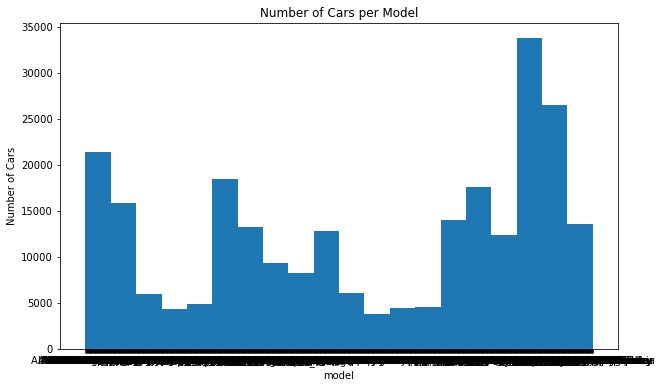

In [99]:
plt.figure(figsize=(10,6))
plt.hist(data['model'],bins=20)
plt.title('Number of Cars per Model')
plt.xlabel('model')
plt.ylabel('Number of Cars')

#### TODO:
too many models, so x axis labels are messed up. Delete some of them?

Text(0, 0.5, 'Number of Cars')

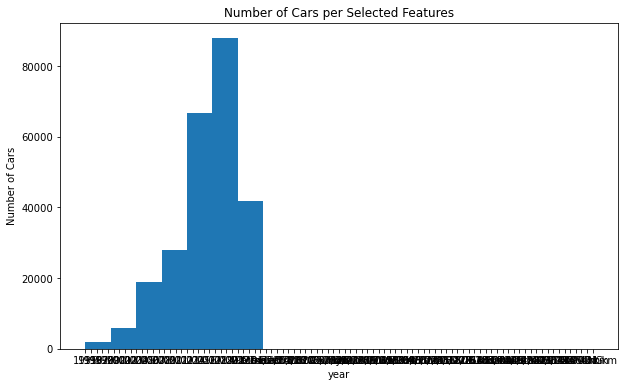

In [49]:
plt.figure(figsize=(10,6))
plt.hist(data['year'],bins=20)
plt.title("Number of Cars per Selected Features")
plt.xlabel('year')
plt.ylabel("Number of Cars")

#### TODO
The above diagram shows that there are very few data for cars older than certain age. So perhaps we can delete them?

Text(0, 0.5, 'Number of Cars')

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


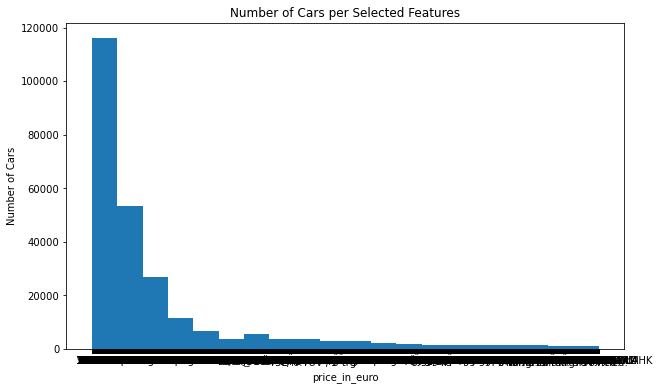

In [50]:
plt.figure(figsize=(10,6))
plt.hist(data['price_in_euro'],bins=20)
plt.title("Number of Cars per Selected Features")
plt.xlabel('price_in_euro')
plt.ylabel("Number of Cars")

TypeError: 'value' must be an instance of str or bytes, not a float

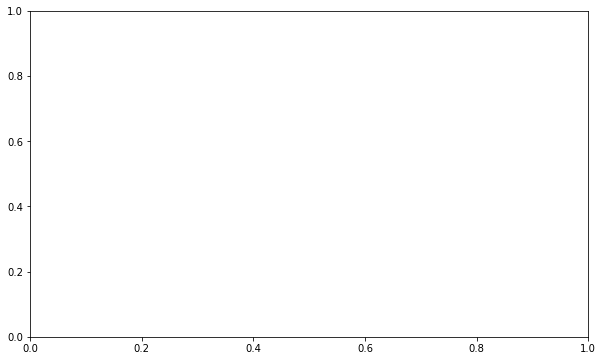

In [52]:
plt.figure(figsize=(10,6))
plt.hist(data['power_kw'],bins=20)
plt.title("Number of Cars per Selected Features")
plt.xlabel('power_kw')
plt.ylabel("Number of Cars")

#### TODO
Above error happend because some elements in the power_kw column were of type float. One solution is to change the type into string as follows. Is this a good idea? 
##### NO: later str type produces problem; suggestion: First clean the file with dropna, etc. and then plot again

Text(0, 0.5, 'Number of Cars')

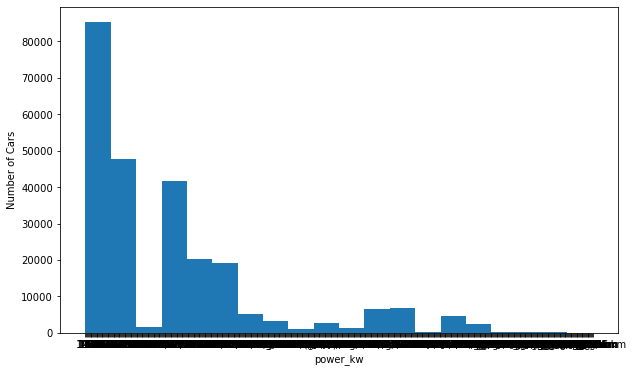

In [105]:
data['power_kw'] = data['power_kw'].astype(str)
plt.figure(figsize=(10,6))
plt.hist(d,bins=20)
plt.xlabel('power_kw')
plt.ylabel('Number of Cars')

TypeError: 'value' must be an instance of str or bytes, not a float

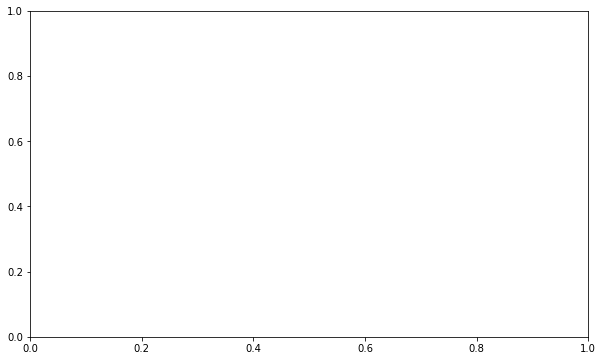

In [53]:
plt.figure(figsize=(10,6))
plt.hist(data['power_ps'],bins=20)
plt.title("Number of Cars per Selected Features")
plt.xlabel('power_ps')
plt.ylabel("Number of Cars")

Text(0, 0.5, 'Number of Cars')

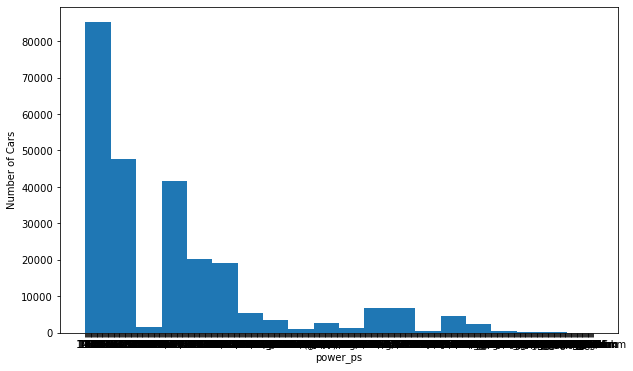

In [106]:
data['power_ps'] = data['power_ps'].astype(str)
plt.figure(figsize=(10,6))
plt.hist(d,bins=20)
plt.xlabel('power_ps')
plt.ylabel('Number of Cars')

TypeError: 'value' must be an instance of str or bytes, not a float

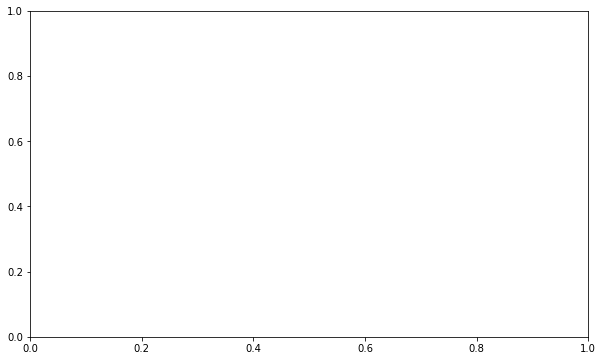

In [54]:
plt.figure(figsize=(10,6))
plt.hist(data['fuel_consumption_l_100km'],bins=20)
plt.title("Number of Cars per Selected Features")
plt.xlabel('fuel_consumption_l_100km')
plt.ylabel("Number of Cars")

Text(0, 0.5, 'Number of Cars')

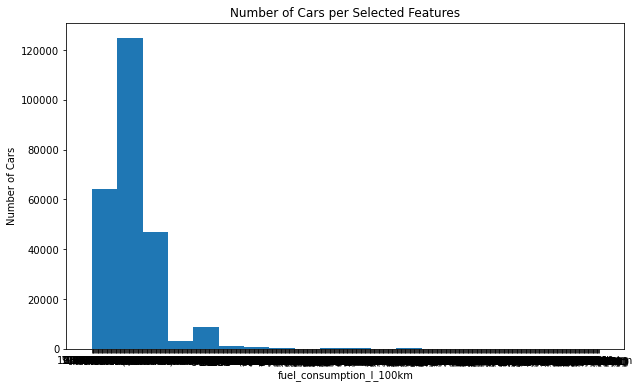

In [107]:
data['fuel_consumption_l_100km']=data['fuel_consumption_l_100km'].astype(str)
plt.figure(figsize=(10,6))
plt.hist(data['fuel_consumption_l_100km'],bins=20)
plt.title("Number of Cars per Selected Features")
plt.xlabel('fuel_consumption_l_100km')
plt.ylabel("Number of Cars")

Text(0, 0.5, 'Number of Cars')

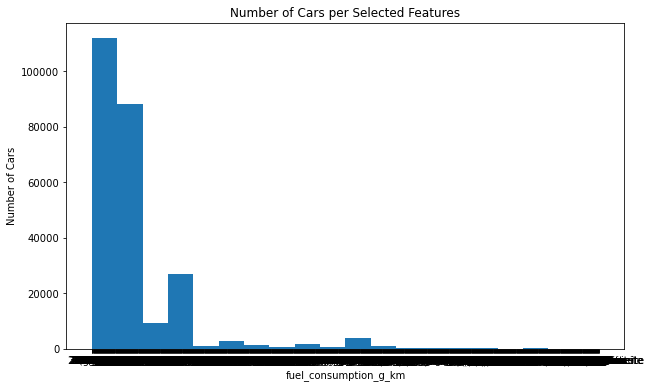

In [55]:
plt.figure(figsize=(10,6))
plt.hist(data['fuel_consumption_g_km'],bins=20)
plt.title("Number of Cars per Selected Features")
plt.xlabel('fuel_consumption_g_km')
plt.ylabel("Number of Cars")

Text(0, 0.5, 'Number of Cars')

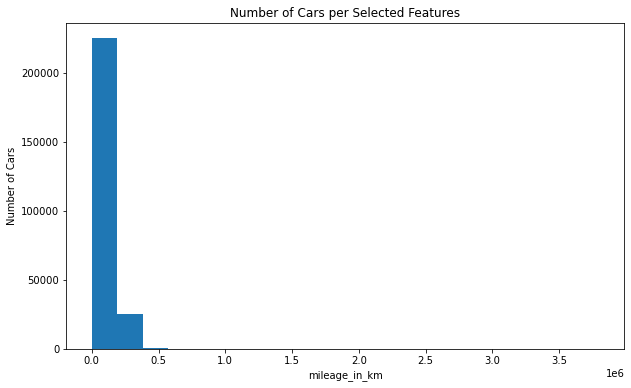

In [56]:
plt.figure(figsize=(10,6))
plt.hist(data['mileage_in_km'],bins=20)
plt.title("Number of Cars per Selected Features")
plt.xlabel('mileage_in_km')
plt.ylabel("Number of Cars")

In [153]:
numerical_cols = ['model', 'year','price_in_euro','power_kw', 'power_ps', 'fuel_consumption_g_km',
       'mileage_in_km'] 
print(numerical_cols)
selected_features = numerical_cols 
selected_features.remove('price_in_euro')
print(selected_features)
#note that this will change numerical_cols list as well:
#print(numerical_cols)

['model', 'year', 'price_in_euro', 'power_kw', 'power_ps', 'fuel_consumption_g_km', 'mileage_in_km']
['model', 'year', 'power_kw', 'power_ps', 'fuel_consumption_g_km', 'mileage_in_km']


TypeError: list indices must be integers or slices, not str

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


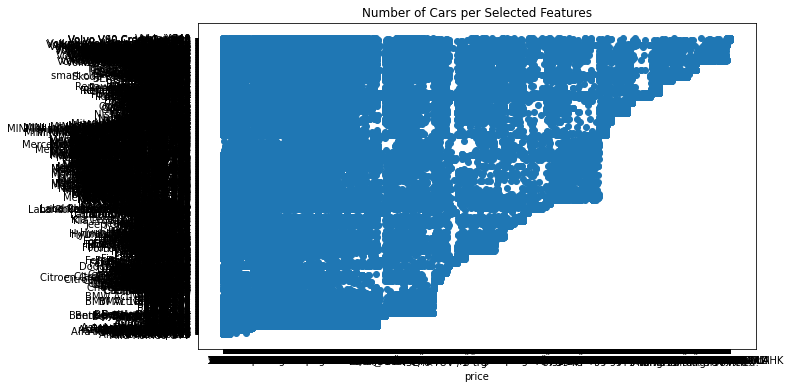

In [155]:
#trying scattered plot of price vs other selected features

for col in selected_features:
    plt.figure(figsize=(10,6))
    plt.scatter(data['price_in_euro'], data[col])
    plt.title("Number of Cars per Selected Features")
    plt.xlabel('price')
    plt.ylabel(selected_features[col])

In [9]:
# since we changed type of some columns, let's reread the dataset
data = pd.read_csv('car_data.csv')

In [18]:
"""we select the following features w numerical calues
to be considered against price"""
numerical_cols = ['model', 'year','price_in_euro','power_kw', 'fuel_consumption_g_km',
       'mileage_in_km'] 
print(numerical_cols)

['model', 'year', 'price_in_euro', 'power_kw', 'fuel_consumption_g_km', 'mileage_in_km']


In [19]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)


Missing values:
Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64


In [20]:
# Convert 'price' column to numeric
data['price_in_euro'] = pd.to_numeric(data['price_in_euro'], errors='coerce')

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
          Unnamed: 0  price_in_euro  mileage_in_km
count  223836.000000   2.237330e+05   2.238360e+05
mean   125630.622130   2.515345e+04   8.749976e+04
std     72797.661024   3.491210e+04   7.913192e+04
min         0.000000   1.200000e+02   0.000000e+00
25%     62734.500000   1.169000e+04   2.668000e+04
50%    125453.500000   1.930000e+04   7.020000e+04
75%    189012.250000   2.899900e+04   1.300000e+05
max    251076.000000   5.890500e+06   3.800000e+06


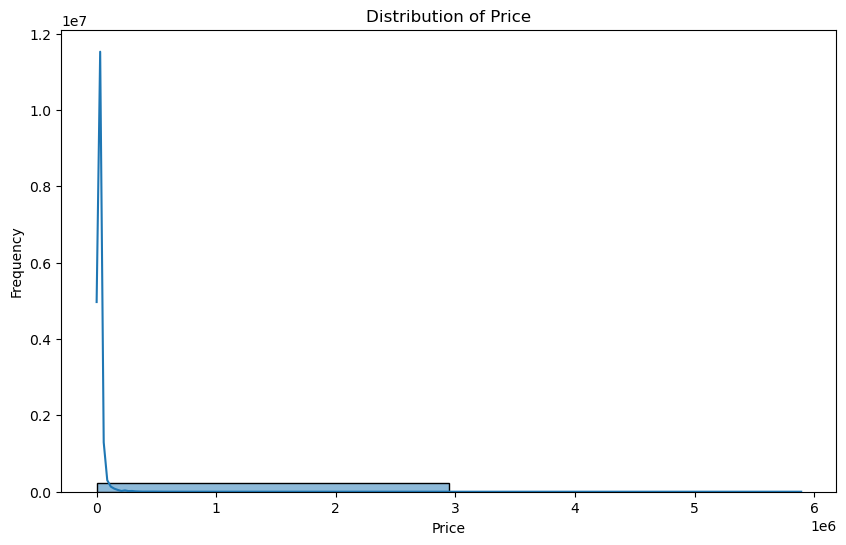

In [23]:
# Histogram of 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(data['price_in_euro'], bins=2, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## 2-Modeling 

## Splitting the Data Set

#### TODO:
What is the target feature?

In [16]:
# Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data.drop(columns=['city'])  # Assuming 'city' is the target variable
y = data['city']
print(X["city"])
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: 'city'

## Linear Regression

In [1]:
# This is how to use functions from another jupyter notebook:
%run regression.ipynb
test()

successful ran test function from the regression notebook


## Boosting

## KNN

In [ ]:
# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

In [ ]:
# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Testing the KNN model
# Predictions on the testing set
knn_predictions = knn.predict(X_test)

In [ ]:
# Evaluating the KNN model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Accuracy score
knn_accuracy = accuracy_score(y_test)

In [17]:
_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(Y_test, knn_predictions))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, knn_predictions))

NameError: name 'y_train' is not defined

  
  ##  Random Forest
  

In [ ]:
# Training the random forest model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model on the training data
rf.fit(X_train, y_train)


# Testing the Random Forest model
# Predictions on the testing set
rf_predictions = rf.predict(X_test)

# Evaluating the Random Forest model
# Accuracy score
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

 ##    Decision Tree

  ## Train/Test

## Cross-Validation

In [ ]:
# K-Fold cross-validation with KNN modeling
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold cross-validation
knn_cv_scores = cross_val_score(knn, X, y, cv=kfold)

# Print the cross-validation scores
print("KNN Cross-Validation Scores:", knn_cv_scores)

# Calculate and print the mean accuracy score
print("Mean Accuracy:", knn_cv_scores.mean())

# K-Fold Cross-Validation with Random Forest modeling
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold cross-validation
rf_cv_scores = cross_val_score(rf, X, y, cv=kfold)

# Print the cross-validation scores
print("Random Forest Cross-Validation Scores:", rf_cv_scores)

# Calculate and print the mean accuracy score
print("Mean Accuracy:", rf_cv_scores.mean())

## Error Metrics

In [ ]:
# Error Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

# Assuming you have predictions and true labels for regression
# For example, let's say you have predictions from a regression model stored in 'y_pred'
# And the true labels are stored in 'y_true'

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Median Absolute Error (medAE)
medae = median_absolute_error(y_true, y_pred)
print("Median Absolute Error (medAE):", medae)

# Calculate R-squared (R2) score
r2 = r2_score(y_true, y_pred)
print("R-squared (R2) Score:", r2)

## 3-Visualization 
-Matplotlib (i,e), -Seaborn (i,e), -Folium (i,e) 

In [1]:
# Visualization with Folium
import folium

# Create a map centered around a specific location
m = folium.Map(location=[37.7749, -122.4194], zoom_start=12)  # Coordinates for San Francisco

# Add a marker to the map
folium.Marker(location=[37.7749, -122.4194], popup="San Francisco").add_to(m)

# Save the map to an HTML file
m.save("map.html")

ModuleNotFoundError: No module named 'folium'

## 4- Results 
Cross Validation